In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import f1_score, recall_score, r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


## Data Observation. Cleaning

In [ ]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)
x = student_performance.data.features
y = student_performance.data.targets
df = pd.concat([x, y], axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
dup = df.duplicated().sum()
print('Duplicates are:', dup)

Duplicates are: 0


In [ ]:
df.rename(columns = {'G3': 'final_grade'}, inplace = True)

## Data Visualization

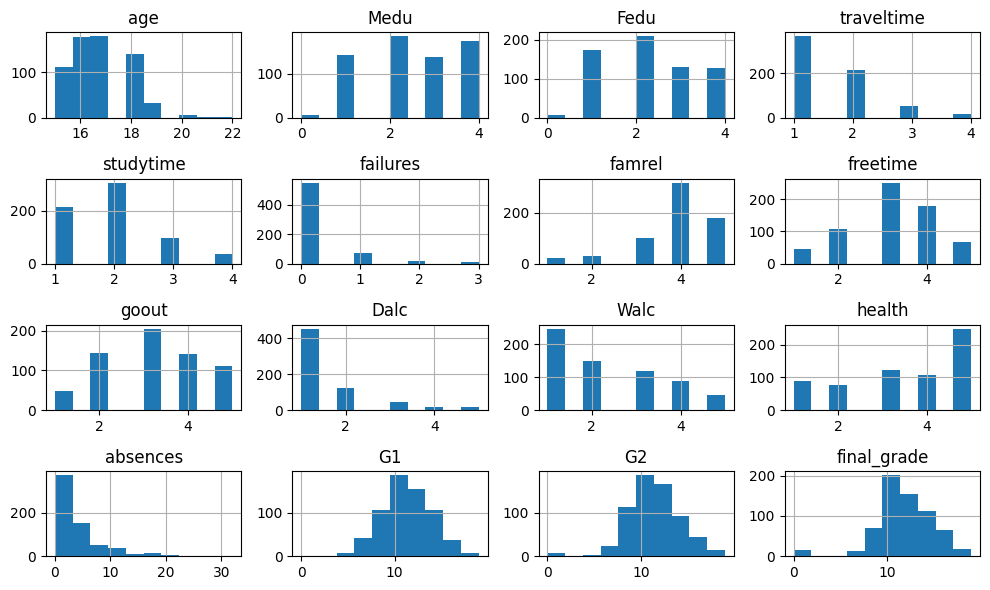

In [ ]:
df.hist(figsize=(10, 6))
plt.tight_layout()

## Data Preprocessing

In [ ]:
# attendance column

total_school_days_estimate = 180 * 0.75

df['attendance'] = (1 - (df['absences'] / total_school_days_estimate)) * 100

In [ ]:
num_df = df.select_dtypes(exclude = 'object')
num_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade,attendance
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,-0.149998
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151,0.008577
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800,-0.029859
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,0.008149
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,0.118389
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,-0.122779
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361,0.089534
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705,0.018716
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641,-0.085374
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719,-0.172952


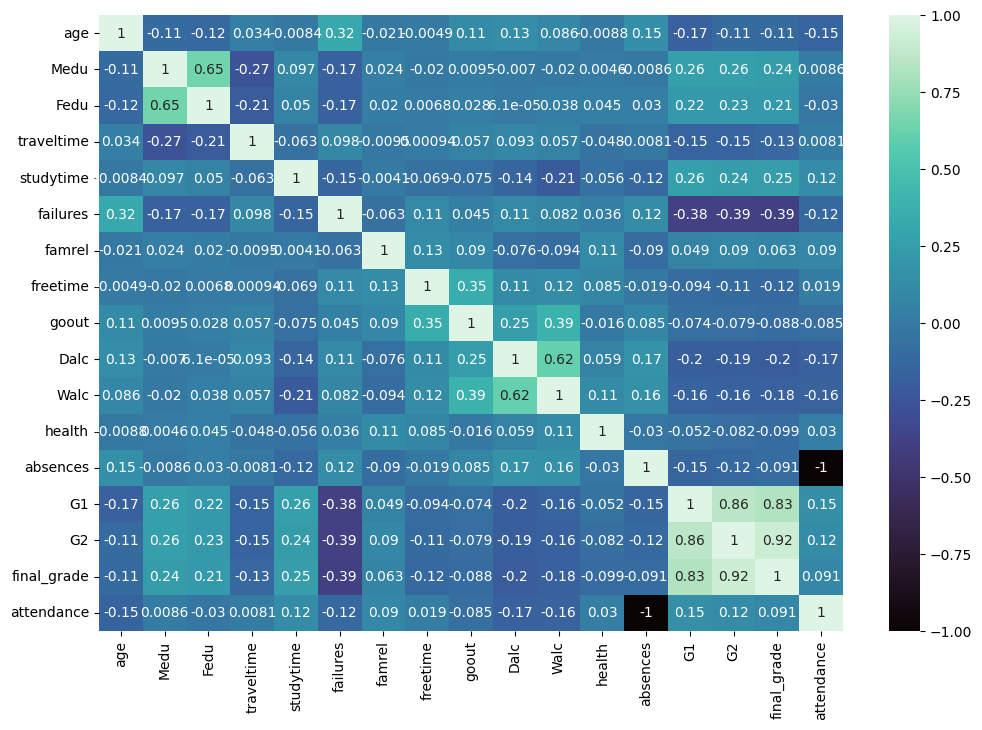

In [ ]:
corr_matrix = num_df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, cmap = 'mako', annot = True)
plt.show()

In [ ]:
# Calculate the correlation matrix for high correlation features with final_grade
corr_matrix = num_df.corr()
high_corr = corr_matrix[abs(corr_matrix['final_grade']) > 0.5]['final_grade']
high_corr = high_corr.drop('final_grade', errors='ignore') # Remove final_grade itself

# Display the feature pairs and correlation values
print(high_corr)

G1    0.826387
G2    0.918548
Name: final_grade, dtype: float64


In [ ]:
df = df[['studytime', 'attendance','famsup', 'G1', 'G2', 'final_grade']]
df

,studytime,attendance,famsup,G1,G2,final_grade
0,2,97.037037,no,0,11,11
1,2,98.518519,yes,9,11,11
2,2,95.555556,no,12,13,12
3,3,100.000000,yes,14,14,14
4,2,100.000000,yes,11,13,13
...,...,...,...,...,...,...
644,3,97.037037,no,10,11,10
645,2,97.037037,yes,15,15,16
646,2,95.555556,no,11,12,9
647,1,95.555556,no,10,10,10


In [ ]:
# transform object columns into numeric

lb = LabelEncoder()
df['famsup'] = lb.fit_transform(df['famsup'])

In [ ]:
# Interquartile Range (IQR) function to remove outliars

data_numeric = df.select_dtypes(exclude='object')

for col in data_numeric.columns:
    q1 = data_numeric[col].quantile(0.25)
    q3 = data_numeric[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)

    # Count outliers
    outliers = ((data_numeric[col] > high) | (data_numeric[col] < low)).sum()
    total = data_numeric.shape[0]
    print(f"Total outliers in {col} are: {outliers} - {round(100 * (outliers / total), 2)}%")

    if outliers > 0:
        # Filter data to exclude outliers
        df = df.loc[(df[col] <= high) & (df[col] >= low)]

Total outliers in studytime are: 35 - 5.39%
Total outliers in attendance are: 21 - 3.24%
Total outliers in famsup are: 0 - 0.0%
Total outliers in G1 are: 16 - 2.47%
Total outliers in G2 are: 25 - 3.85%
Total outliers in final_grade are: 16 - 2.47%


In [ ]:
# 20% test size

x = df.drop('final_grade', axis = 1).values
y = df['final_grade'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#  normalize the features ie each column
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# prediction using on new sample
new_sample = [[3, 94, 1, 9, 14]]
new_sample = sc.transform(new_sample)
prediction = lr.predict(new_sample)

print(prediction)

[13.45578842]


## KNN

In [ ]:
# KNN

knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'F1 Score: {r2}')

F1 Score: 0.8701439030547842


In [ ]:
# prediction using on new sample
new_sample = [[3, 94, 1, 9, 14]]
new_sample = sc.transform(new_sample)
prediction = knn.predict(new_sample)

print(prediction)

[13.8]


## Metrics

In [ ]:
# Linear Regression Metrics fo 20% test size
lr_r2 = r2_score(y_test, lr.predict(x_test))
lr_mse = mean_squared_error(y_test, lr.predict(x_test))
lr_mae = mean_absolute_error(y_test, lr.predict(x_test))

# KNN Metrics
knn_r2 = r2_score(y_test, knn.predict(x_test))
knn_mse = mean_squared_error(y_test, knn.predict(x_test))
knn_mae = mean_absolute_error(y_test, knn.predict(x_test))

# Create the metrics table
models = ['Linear Regression', 'KNN']
data = [[lr_r2, lr_mse, lr_mae], [knn_r2, knn_mse, knn_mae]]
cols = ['R2', 'MSE', 'MAE']

metrics_df = pd.DataFrame(data, columns=cols, index=models).sort_values(ascending=False, by='R2')

# Display the metrics table
print(metrics_df)

                         R2       MSE       MAE
Linear Regression  0.890898  0.626794  0.651679
KNN                0.841105  0.912857  0.769643


## Prediction on Different Test Size

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Define the splits
splits = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Iterate through the splits
for train_size, test_size in splits:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Scale the data
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Train and predict using Linear Regression
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    lr_predictions = lr.predict(x_test)

    # Train and predict using KNN
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(x_train, y_train)
    knn_predictions = knn.predict(x_test)

    # Calculate metrics for both models
    lr_r2_score = r2_score(y_test, lr_predictions)
    lr_mae = mean_absolute_error(y_test, lr_predictions)
    lr_mse = mean_squared_error(y_test, lr_predictions)

    knn_r2_score = r2_score(y_test, knn_predictions)
    knn_mae = mean_absolute_error(y_test, knn_predictions)
    knn_mse = mean_squared_error(y_test, knn_predictions)


    # Print the split information and metrics
    print(f"\nSplit: Train {train_size:.0%} / Test {test_size:.0%}")
    print(f"Linear Regression - R-squared: {lr_r2_score:.4f}, MAE: {lr_mae:.4f}, MSE: {lr_mse:.4f}")
    print(f"KNN - R-squared: {knn_r2_score:.4f}, MAE: {knn_mae:.4f}, MSE: {knn_mse:.4f}")


Split: Train 80% / Test 20%
Linear Regression - R-squared: 0.8894, MAE: 0.6157, MSE: 0.5590
KNN - R-squared: 0.8701, MAE: 0.6661, MSE: 0.6561

Split: Train 70% / Test 30%
Linear Regression - R-squared: 0.8847, MAE: 0.6384, MSE: 0.6094
KNN - R-squared: 0.8462, MAE: 0.7131, MSE: 0.8126

Split: Train 60% / Test 40%
Linear Regression - R-squared: 0.8909, MAE: 0.6517, MSE: 0.6268
KNN - R-squared: 0.8411, MAE: 0.7696, MSE: 0.9129


In [ ]:
# Predict using LR and KNN on the entire test set
lr_predictions = lr.predict(x_test)
knn_predictions = knn.predict(x_test)

# Print the predictions for LR and KNN
print("Linear Regression Predictions:")
for prediction in lr_predictions:
    print(prediction)

print("\nKNN Predictions:")
for prediction in knn_predictions:
    print(prediction)

Linear Regression Predictions:
12.65184358663518
14.424119465008
13.843913440970816
13.611545297403502
11.602230156618944
11.799836853132064
10.27237499680834
13.580109884813295
17.545432544111378
13.591156472263973
13.682413275892328
12.005440702953598
7.39533541622556
13.362114363160646
11.641662722517564
13.682413275892328
11.768401440541858
12.311780465802666
10.849477380052594
11.854987125325787
16.160427112107048
11.29827356722106
13.037768948623235
9.459800829203841
10.64719956469505
9.870731928525185
10.592049292501326
9.839296515934977
13.20061419808216
11.839269419030684
8.3944696928925
10.288092703103443
10.40243974929662
12.672232411774711
14.273804187541051
17.228945982721516
15.619515353807621
13.448700047944577
12.509387162315786
11.159863644707396
11.321988426824577
11.341752634925411
12.636125880340078
8.966900957292331
14.695920174473933
11.638336688053576
11.243123295027337
12.885556814582934
8.314884093753516
16.38493640252681
14.44316320576709
10.090486006590323
8.

# Analysis and Comparison

## R-squared Comparison:

For every data split, R-squared performance for Linear Regression is consistently higher than that of KNN. With an R-squared of 0.8894 for the 80%/20% split, Linear Regression accounts for over 89% of the variation in the target variable. In contrast, KNN attains a somewhat reduced R-squared of 0.8701. The R-squared of linear regression only slightly declines with an increase in the test set; values for the 70%/30% split and the 60%/40% split are 0.8847 and 0.8909, respectively. R-squared for KNN decreases more sharply, reaching 0.8462 for the 70%/30% split and 0.8411 for the 60%/40% split. This shows that, in comparison to KNN, Linear Regression offers a more consistent and superior fit across various train/test splits.



## MAE Comparison:

Although the difference between the two models grows as the test size increases, Linear Regression likewise performs better throughout the splits in terms of Mean Absolute Error (MAE). Linear Regression's MAE for the 80%/20% split is 0.6157, however KNN displays a larger error of 0.6661. Linear Regression's MAE climbs to 0.6517 for the 60%/40% split and 0.6384 for the 70%/30% split as the test set size increases, suggesting a minor drop in accuracy. With a 70%/30% split and a 60%/40% split, KNN's MAE grows more dramatically, reaching 0.7131 and 0.7696, respectively. This implies that, for a variety of data divisions, Linear Regression consistently produces better accurate predictions than KNN.



## MSE Comparison:

Again, Linear Regression shows reduced error rates in comparison to KNN when comparing Mean Squared Error (MSE). Linear regression produces an MSE of 0.5590 for the 80%/20% split, but KNN produces a higher MSE of 0.6561. The MSE of linear regression increases with the size of the test set, reaching 0.6268 for the 60%/40% split and 0.6094 for the 70%/30% split. MSE increases more sharply for KNN, with values of 0.9129 for the 60%/40% split and 0.8126 for the 70%/30% split. These findings demonstrate that, even when the test set grows, Linear Regression minimizes big prediction mistakes more reliably while maintaining lower overall error rates.

# Conclusion

## Improved Conclusion:

Linear Regression  emerges as the superior model in this analysis, consistently outperforming K-Nearest Neighbors (KNN) across all evaluated metrics—R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

Linear Regression consistently demonstrates a stronger fit to the data, as evidenced by its higher R-squared values, indicating a better explanation of the target variable's variance. Moreover, its lower MAE and MSE values highlight its superior predictive accuracy and robustness against large prediction errors. When considering the impact of varying train-test splits, Linear Regression exhibits remarkable stability. Its performance remains relatively consistent even with larger test sets, showcasing its reliability and adaptability to diverse data scenarios. In contrast, KNN's performance deteriorates more significantly with increasing test sizes, suggesting potential limitations in handling larger datasets or applications demanding high accuracy across different data distributions.

In conclusion, Linear Regression proves to be the more dependable and effective model, particularly for scenarios requiring high predictive accuracy, minimal error, and robustness in the face of varying data splits.
